In [15]:
from pylab import*
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import*
from scipy import special
from def_crs import*
from model_fct import*
from g_funct import*
from FBT import FBT 
from model_fct import*
from def_conv_crs_1h import*
from def_conv_crs_2h import*

import pandas as pd
import sys 


In [18]:
def grids(df,su2,charm,scale,coef,nf):
    mdl_den = 'pwr_lw_star'
    mdl_num = 'gauss'
    g_k_2h = 'PV17'
    coef = coef #0.27

    dati_lp = pd.read_csv("fit_parameters/lp_point.csv")
    dati_lk = pd.read_csv("fit_parameters/lk_point.csv")

    fnc = polarization(coef)
    fnc.scale = scale
    fnc.mass = 1.115 
    fnc.frag2 = 'dss'
    fnc.mdl_num = mdl_num 
    fnc.mdl_den = mdl_den 
    fnc.charm =charm
    fnc.nf= nf
    
    fnc.g_k = g_k_2h 

    if su2=='no':

        f_prm=arange(0.,18.,1.)
        f_prm[0] = df['NUP']
        f_prm[1] = df['NDO']#par[0]  #do
        f_prm[2] = df['NST']  #par[0]      #st
        f_prm[3] = df['NSEA']  #par[0]      #upb
        f_prm[4] = f_prm[3] #par[0]      #dob
        f_prm[5] = f_prm[3] # par[0]      #stb
        #¯¯¯¯¯¯
        f_prm[6] = df['AUP']      #aup
        f_prm[7] = df['ADO']      #ado
        f_prm[8] = df['AST']  # par[0]      #ast
        f_prm[9] = df['ASEA']      #aupb
        f_prm[10] = f_prm[9] #par[0]      #adob
        f_prm[11] = f_prm[9] #par[0]      #astb
        #¯#¯¯¯¯¯¯¯
        f_prm[12] = df['BUP'] #par[0]      #bup
        f_prm[13] = df['BDO']      #bdo
        f_prm[14] = df['BST']      #bst
        f_prm[15] =  df['BSEA'] #par[0]      #bupb
        f_prm[16] = f_prm[15] #par[0]      #bdob
        f_prm[17] = f_prm[15] # par[0]      #bstb
        pt_pp=float(df['PP'])

    elif su2=='yes':

        f_prm=arange(0.,18.,1.)
        f_prm[0] = df['NUP']
        f_prm[1] = df['NUP']#par[0]  #do
        f_prm[2] = df['NST']  #par[0]      #st
        f_prm[3] = df['NSEA']  #par[0]      #upb
        f_prm[4] = df['NSEA'] #par[0]      #dob
        f_prm[5] = df['NDO']# par[0]      #stb
        #¯¯¯¯¯¯
        f_prm[6] = df['AUP']     #aup
        f_prm[7] = df['AUP']      #ado
        f_prm[8] = df['AST']  # par[0]      #ast
        f_prm[9] = df['ASEA']      #aupb
        f_prm[10] = df['ASEA'] #par[0]      #adob
        f_prm[11] = df['ADO'] #par[0]      #astb
        #¯#¯¯¯¯¯¯¯
        f_prm[12] = df['BUP'] #par[0]      #bup
        f_prm[13] = df['BUP']      #bdo
        f_prm[14] = df['BST']      #bst
        f_prm[15] =  df['BSEA'] #par[0]      #bupb
        f_prm[16] = df['BSEA'] #par[0]      #bdob
        f_prm[17] = df['BDO'] # par[0]      #bstb
        pt_pp=float(df['PP'])


    num=zeros(len(dati_lp.had1))
    i=0


    # In[6]:


    for hads1,hads2,zs1,zs2 in zip(dati_lp.had1,dati_lp.had2,dati_lp.z1,dati_lp.z2):

        if hads1 == 300 : had1='lbd'
        elif hads1 == 310 : had1='lbd_b'

        if hads2 == 100 : had2='pi+'
        elif hads2 == 105 : had2='pi-'
        elif hads2 == 200 : had2='k-'
        elif hads2 == 205 : had2='k-'

        num[i]= fnc.ratio(had1,had2,zs1,zs2,f_prm,pt_pp,0)
        i+=1

    dati_lp['conv'] = num


    num=zeros(len(dati_lk.had1))
    i=0
    for hads1,hads2,zs1,zs2 in zip(dati_lk.had1,dati_lk.had2,dati_lk.z1,dati_lk.z2):
        if hads1 == 300 : had1='lbd'
        elif hads1 == 310 : had1='lbd_b'

        if hads2 == 100 : had2='pi+'
        elif hads2 == 105 : had2='pi-'
        elif hads2 == 200 : had2='k+'
        elif hads2 == 205 : had2='k-'

        num[i]= fnc.ratio(had1,had2,zs1,zs2,f_prm,pt_pp,0)
        i+=1


    dati_lk['conv'] = num

    dati_lk=dati_lk.drop(columns=['mins','maxx','fit_line'])
    dati_lp=dati_lp.drop(columns=['mins','maxx','fit_line'])
    
    return dati_lp, dati_lk

In [19]:
scale = 10.58
su2_1= 'no'
charm1='no'
su2_2= 'no'
charm2='yes'
su2_3= 'yes'
charm3='yes'

#df1 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.174__True_gk_PV17_su_no_charmno.csv')
#df2 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.262__True_gk_PV17_su_no_charmyes.csv')
#df3 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.447__True_gk_PV17_su_yes_charmyes.csv')

df1 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.174__True_gk_PV17_su_no_charmno_correction_no.csv')
df2 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.259__True_gk_PV17_su_no_charmyes_correction_no.csv')
df3 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.503__True_gk_PV17_su_yes_charmyes_correction_no.csv')

#df1 = pd.read_csv('fit_parameters/to_use_updated/fit_hadron_coef_0.25_chi_1.189__True_gk_PV17_su_no_charmno.csv')
#df2 = pd.read_csv('fit_parameters/to_use_updated/fit_hadron_coef_0.27_chi_1.269__True_gk_PV17_su_no_charmyes.csv')
#df3 = pd.read_csv('fit_parameters/to_use_updated/fit_hadron_coef_0.27_chi_1.441__True_gk_PV17_su_yes_charmyes.csv')


dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')

dati_lp1,dati_lk1=grids(df1,su2_1,charm1,scale,0.27,3)
dati_lp2,dati_lk2=grids(df2,su2_2,charm2,scale,0.27,4)
dati_lp3,dati_lk3=grids(df3,su2_3,charm3,scale,0.27,4)

/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm/Sudakov/sudakov_factor.py:63: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar/(1-np.exp(-bt**4/self.bmin**4))**(1/4)


In [20]:
fact=642/732
fact=1.

dati_exp

,h1,h2,z1,z2,P_exp,P(theo),err,unpol
0,300,100,0.25,0.25,-0.0390,-0.02600,0.004080,0.151000
1,300,100,0.25,0.35,-0.0474,-0.03910,0.006344,0.065820
2,300,100,0.25,0.45,-0.0708,-0.05191,0.008810,0.031190
3,300,100,0.25,0.60,-0.0757,-0.07459,0.010020,0.010960
4,300,100,0.35,0.25,-0.0243,-0.02172,0.003933,0.061360
...,...,...,...,...,...,...,...,...
123,310,205,0.45,0.60,-0.0826,-0.05592,0.012650,0.002413
124,310,205,0.60,0.25,-0.0508,-0.03499,0.007599,0.006919
125,310,205,0.60,0.35,-0.0609,-0.04695,0.010480,0.003658
126,310,205,0.60,0.45,-0.0621,-0.05716,0.014030,0.002022


In [21]:
dati_exp['P_exp']=dati_exp['P_exp']*fact
dati_exp['err']=dati_exp['err']*fact
dati_exp

,h1,h2,z1,z2,P_exp,P(theo),err,unpol
0,300,100,0.25,0.25,-0.0390,-0.02600,0.004080,0.151000
1,300,100,0.25,0.35,-0.0474,-0.03910,0.006344,0.065820
2,300,100,0.25,0.45,-0.0708,-0.05191,0.008810,0.031190
3,300,100,0.25,0.60,-0.0757,-0.07459,0.010020,0.010960
4,300,100,0.35,0.25,-0.0243,-0.02172,0.003933,0.061360
...,...,...,...,...,...,...,...,...
123,310,205,0.45,0.60,-0.0826,-0.05592,0.012650,0.002413
124,310,205,0.60,0.25,-0.0508,-0.03499,0.007599,0.006919
125,310,205,0.60,0.35,-0.0609,-0.04695,0.010480,0.003658
126,310,205,0.60,0.45,-0.0621,-0.05716,0.014030,0.002022


In [22]:
y_lbl=50
x_lbl =50

ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti
title_s=35 #dimensione titolo bin
fit_l=3.  # dimensione linea fit

z1=[0.25,.35,.45,.6]
lim=[-0.15,0.15]
ct=1
z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]


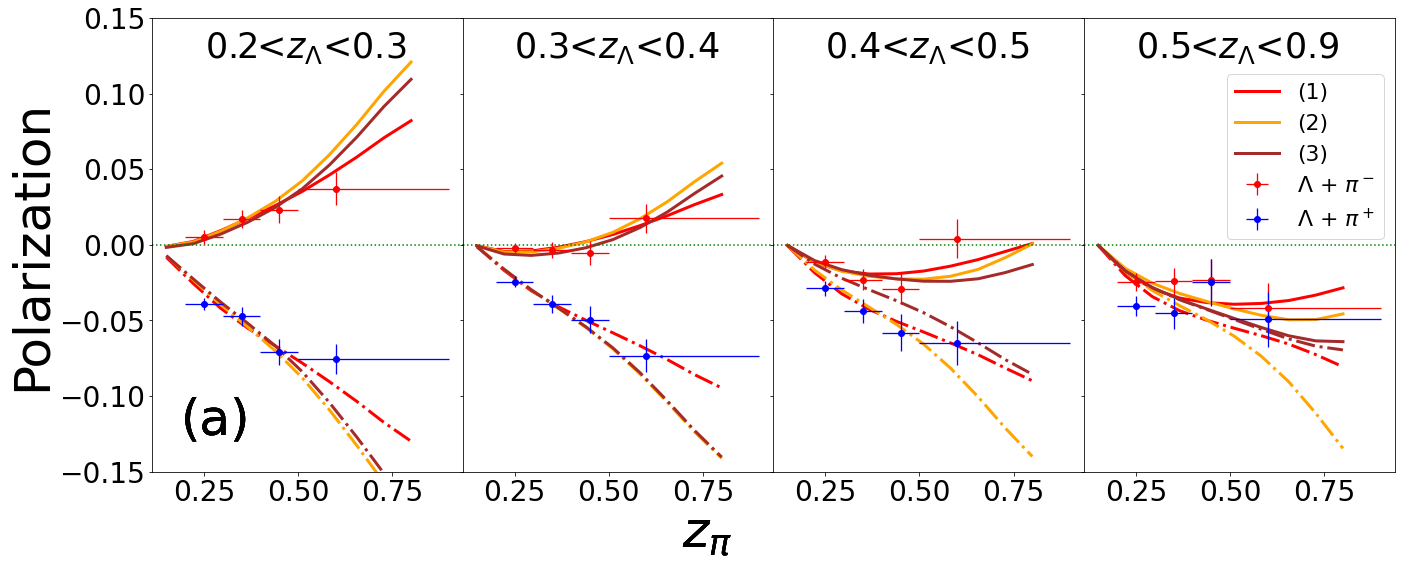

In [31]:
ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['had1']==300) & (dati_lp1['z1']==zs)& (dati_lp1['had2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['had1']==300) & (dati_lp2['z1']==zs)& (dati_lp2['had2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['had1']==300) & (dati_lp3['z1']==zs)& (dati_lp3['had2']==105)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	


    ax=plt.subplot(1,4,ct)

    ### new fit lines
    ax.plot(dt12.z2,dt12.conv,label='(1)',linewidth=fit_l,color='red')
    ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='red')

    ax.plot(dt12.z2,dt22.conv,label='(2)',linewidth=fit_l,color='orange')
    ax.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='orange')

    ax.plot(dt12.z2,dt32.conv,label='(3)',linewidth=fit_l,color='brown')
    ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='brown')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
fig.savefig('plot_draft/Lb_pi.pdf')
fig.savefig('plot_draft/Lb_pi.png')

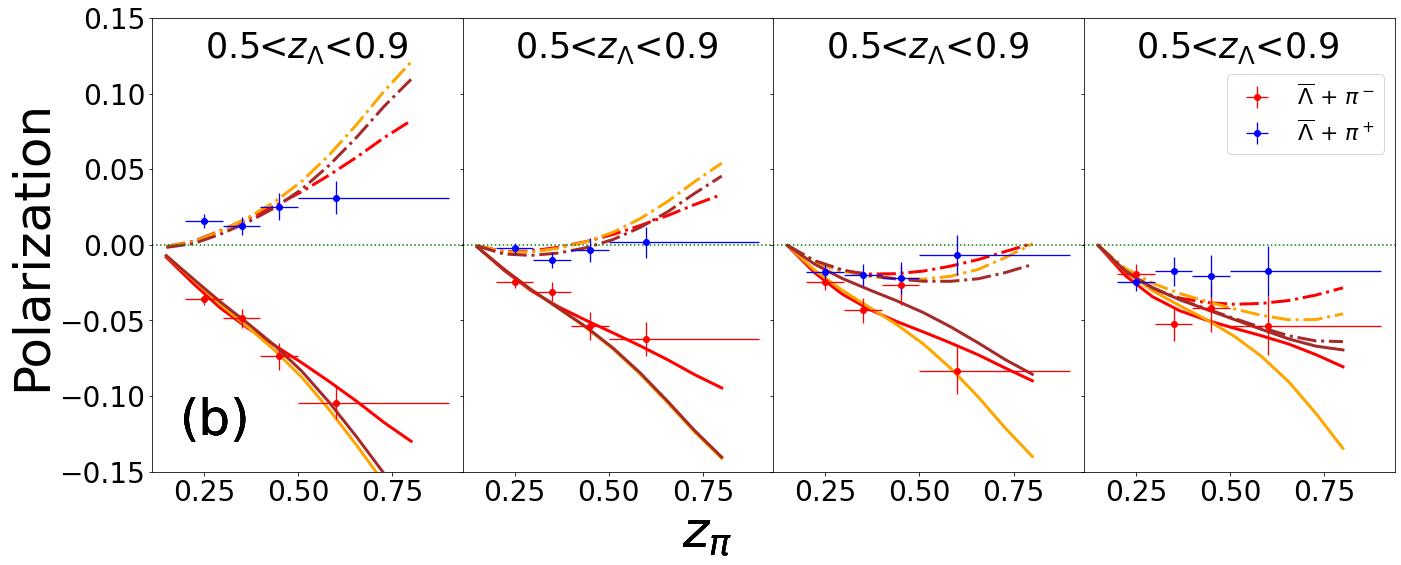

In [32]:
ct=1
fig2, axes2 = plt.subplots(1,4)
for zs2,ax2 in zip(z1,axes2):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lp1.loc[(dati_lp1['had1']==310) & (dati_lp1['z1']==zs2)& (dati_lp1['had2']==100)]
    dt12 = dati_lp1.loc[(dati_lp1['had1']==310) & (dati_lp1['z1']==zs2)& (dati_lp1['had2']==105)]

    dt2 = dati_lp2.loc[(dati_lp2['had1']==310) & (dati_lp2['z1']==zs2)& (dati_lp2['had2']==100)]
    dt22 = dati_lp2.loc[(dati_lp2['had1']==310) & (dati_lp2['z1']==zs2)& (dati_lp2['had2']==105)]

    dt3 = dati_lp3.loc[(dati_lp3['had1']==310) & (dati_lp3['z1']==zs2)& (dati_lp3['had2']==100)]
    dt32 = dati_lp3.loc[(dati_lp3['had1']==310) & (dati_lp3['z1']==zs2)& (dati_lp3['had2']==105)]

    pnt = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs2)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs2)& (dati_exp['h2']==105)]	

    ax2=plt.subplot(1,4,ct)

    ### new fit lines
    ax2.plot(dt12.z2,dt12.conv,label='_no.su2_no.charm',linewidth=fit_l,color='red')
    ax2.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='red')

    ax2.plot(dt12.z2,dt22.conv,label='_no.su2_yes.charm',linewidth=fit_l,color='orange')
    ax2.plot(dt1.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='orange')

    ax2.plot(dt12.z2,dt32.conv,label='_yes.su2_yes.charm',linewidth=fit_l,color='brown')
    ax2.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='brown')

    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax2.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $\pi^-$')
    ax2.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax2.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax2.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax2.set_ylim(lim)
    ct+=1
    fig2.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig2.text(0.15, 0.25, '(b)', ha='center',size=x_lbl)
    #fig2.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig2.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig2.set_size_inches(19.5, 10.5, forward=True)
fig2.savefig('plot_draft/Lbb_pi.pdf')
fig2.savefig('plot_draft/Lbb_pi.png')
#fig2.savefig('Lbb_pi_new.png')

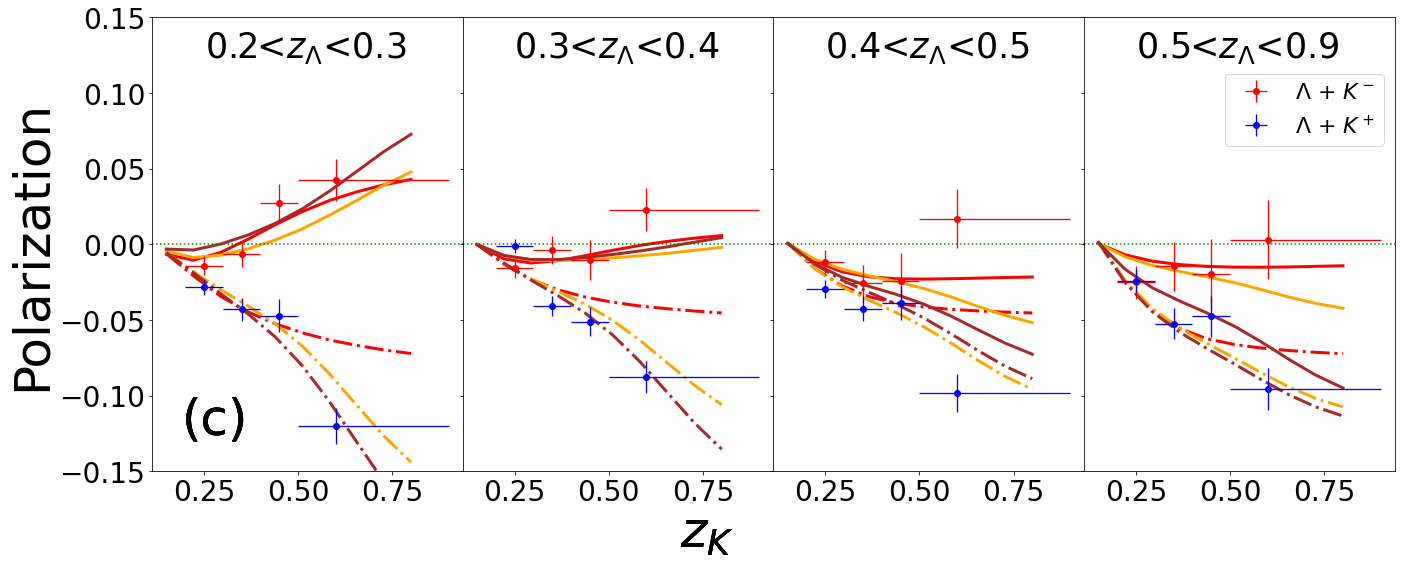

In [33]:
ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)
    ### new fit lines
    ax.plot(dt12.z2,dt12.conv,label='_no.su2_no.charm',linewidth=fit_l,color='red')
    ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='red')

    ax.plot(dt22.z2,dt22.conv,label='_no.su2_yes.charm',linewidth=fit_l,color='orange')
    ax.plot(dt2.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='orange')
    
    ax.plot(dt12.z2,dt32.conv,label='_yes.su2_yes.charm',linewidth=fit_l,color='brown')
    ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='brown')

    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
fig.savefig('plot_draft/Lb_k.pdf')
fig.savefig('plot_draft/Lb_k.png')
#fig.savefig('Lb_k_new.png')

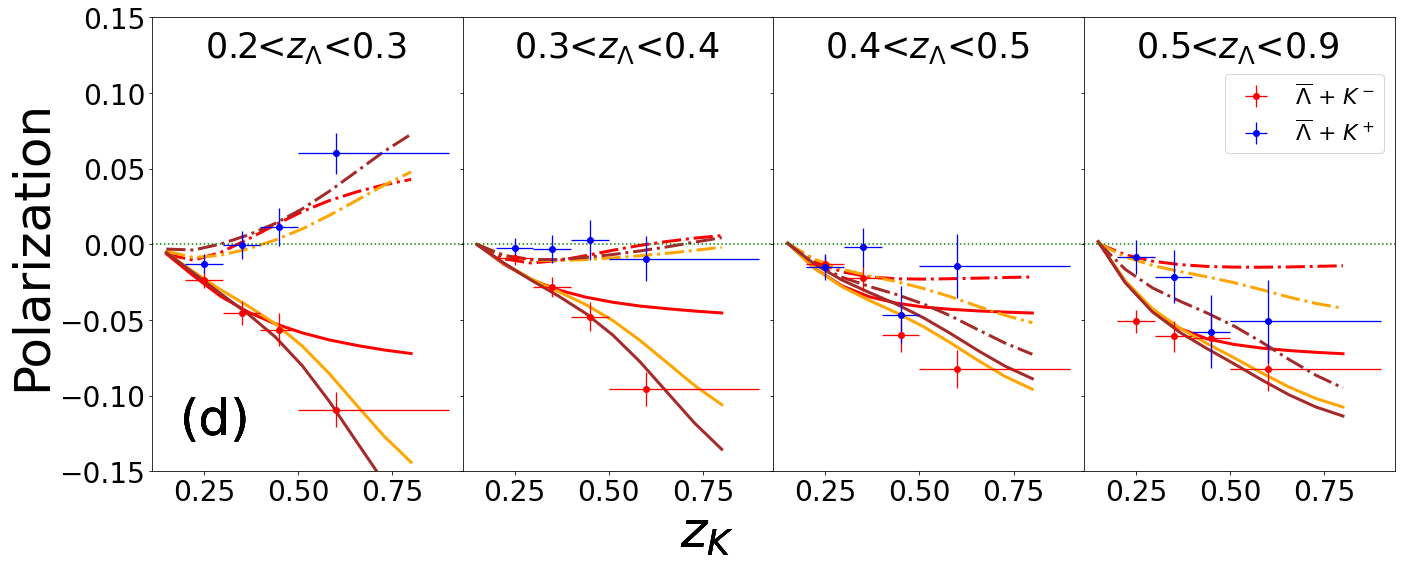

In [34]:
ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==310) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==310) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==310) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==310) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==310) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==310) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)
    ### new fit lines
    ax.plot(dt12.z2,dt12.conv,label='_no.su2_no.charm',linewidth=fit_l,color='red')
    ax.plot(dt1.z2,dt1.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='red')

    ax.plot(dt22.z2,dt22.conv,label='_no.su2_yes.charm',linewidth=fit_l,color='orange')
    ax.plot(dt2.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='orange')
    
    ax.plot(dt12.z2,dt32.conv,label='_yes.su2_yes.charm',linewidth=fit_l,color='brown')
    ax.plot(dt1.z2,dt3.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='brown')

    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=22,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(d)', ha='center',size=x_lbl)
    #fig.text(0.7, 0.65, 'Q = '+str(scale), ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
fig.savefig('plot_draft/Lbb_k.pdf')
fig.savefig('plot_draft/Lbb_k.png')
#fig.savefig('Lbb_k_new.png')

## Test: Polarization at Different Scale 

In [45]:
z1=[0.25,.35,.45,.6]
#z1=[.35,.45,.6]

lim=[-0.15,0.15]

scale = 14.58
su2_1= 'no'
charm1='no'

su2_2= 'no'
charm2='yes'

su2_3= 'yes'
charm3='yes'

#df1 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.174__True_gk_PV17_su_no_charmno.csv')
#df2 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.262__True_gk_PV17_su_no_charmyes.csv')
#df3 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.447__True_gk_PV17_su_yes_charmyes.csv')
#dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')

#dati_lp1,dati_lk1=grids(df1,su2_1,charm1,scale)
#dati_lp2,dati_lk2=grids(df2,su2_2,charm2,scale)
#dati_lp3,dati_lk3=grids(df3,su2_3,charm3,scale)



df1 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.174__True_gk_PV17_su_no_charmno_correction_no.csv')
df2 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.259__True_gk_PV17_su_no_charmyes_correction_no.csv')
df3 = pd.read_csv('fit_parameters/fit_hadron_coef_0.27_chi_1.503__True_gk_PV17_su_yes_charmyes_correction_no.csv')


dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')

dati_lp1,dati_lk1=grids(df1,su2_1,charm1,scale,0.27,3)
dati_lp2,dati_lk2=grids(df2,su2_2,charm2,scale,0.27,4)
dati_lp3,dati_lk3=grids(df3,su2_3,charm3,scale,0.27,4)

/home/zackmrc/Documenti/git_project/SIDIS_epem_git/def_convolution_v3.1_survey_PV17_charm/Sudakov/sudakov_factor.py:63: RuntimeWarning: invalid value encountered in double_scalars
  bstar = bstar/(1-np.exp(-bt**4/self.bmin**4))**(1/4)


In [1]:
ct=1
fig, axes = plt.subplots(1,len(z1))
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt1 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==200)]
    dt12 = dati_lk1.loc[(dati_lk1['had1']==300) & (dati_lk1['z1']==zs)& (dati_lk1['had2']==205)]

    dt2 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==200)]
    dt22 = dati_lk2.loc[(dati_lk2['had1']==300) & (dati_lk2['z1']==zs)& (dati_lk2['had2']==205)]

    dt3 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==200)]
    dt32 = dati_lk3.loc[(dati_lk3['had1']==300) & (dati_lk3['z1']==zs)& (dati_lk3['had2']==205)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,len(z1),ct)
    ### new fit lines
    ax.plot(dt12.z2,dt12.conv,label='_(1) $\Lambda$ $K^-$ ',linewidth=fit_l,color='red')
    ax.plot(dt1.z2,dt1.conv,label='_(1) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='red')

    ax.plot(dt22.z2,dt22.conv,label='_(2) $\Lambda$ $K^-$ ',linewidth=fit_l,color='orange')
    ax.plot(dt2.z2,dt2.conv,label='_(2) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='orange')
    
    ax.plot(dt12.z2,dt32.conv,label='_(3) $\Lambda$ $K^-$ ',linewidth=fit_l,color='brown')
    ax.plot(dt1.z2,dt3.conv,label='_(3) $\Lambda$ $K^+$ ',linewidth=fit_l,linestyle='-.',color='brown')

    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    if zs == 0.25: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("$z_{\Lambda}$ = "+str(zs),fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==len(z1) :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=25,frameon=False), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    #fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
    fig.text(0.65, 0.65, '$Q$ = '+str(scale)+' GeV', ha='center',size=25)

fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
#fig.savefig('Lb_k.pdf')
#fig.savefig('Lb_k.png')
#fig.savefig('plot_scale/Lb_k_scale_'+str(scale)+'.png')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2.pdf')
#fig.savefig('plot_draft/Lb_k_scale_'+str(scale)+'_2.png')

NameError: name 'plt' is not defined